**Chicago Ordinance Violations Analysis**

**This dataset contains information about every building-related ordinance violation in Chicago,Illinois,from 2008 to the present.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

**Reading the file using pandas.**

In [5]:
df_chicago = pd.read_csv("chicago_violations.csv")

**Describing the dataset.**

In [6]:
df_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784225 entries, 0 to 784224
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     784225 non-null  object 
 1   DOCKET NUMBER          784122 non-null  object 
 2   NOV NUMBER             784225 non-null  object 
 3   ADDRESS                784225 non-null  object 
 4   STREET NUMBER          784225 non-null  int64  
 5   STREET DIRECTION       784219 non-null  object 
 6   STREET NAME            784225 non-null  object 
 7   STREET TYPE            776027 non-null  object 
 8   WARD                   781415 non-null  float64
 9   ISSUING DEPARTMENT     784225 non-null  object 
 10  HEARING DATE           784122 non-null  object 
 11  CASE DISPOSITION       766095 non-null  object 
 12  IMPOSED FINE           784225 non-null  float64
 13  ADMIN COSTS            784225 non-null  int64  
 14  LAST MODIFIED DATE     784225 non-nu

*The dataset contains records of building-related ordinance violations in Chicago, including unique case identifiers, addresses, and details about violations.*

*It includes legal proceedings information such as docket numbers, hearing dates, and case dispositions, which indicate whether a case was dismissed, found liable, or continued.*

*Financial aspects are covered through imposed fines and administrative costs, reflecting the penalties associated with violations.*

*Geographic data such as ward numbers, street locations, latitude, and longitude will help in analyzing violations by area.*

*The dataset is structured with both categorical and numerical variables, allowing for legal, financial, and spatial analysis of building ordinance violations.*

**Number of rows and columns in the dataframe**

In [7]:
print("Number of rows:", df_chicago.shape[0])
print("Number of columns:", df_chicago.shape[1])

Number of rows: 784225
Number of columns: 22


**I Choose ward number 6 at random. Filtered the dataset, so that
it only contains records with chosen ward 6.**

In [8]:
df_6 = df_chicago[df_chicago['WARD'] == 6]

**Number of records after filtering the dataframe to ward 6**

In [9]:
print("Number of rows:", df_6.shape[0])
print("Number of columns:", df_6.shape[1])

Number of rows: 39556
Number of columns: 22


**Three Interesting Facts About Your Ward**

**Historical Significance:** *The 6th Ward is home to the historic Chatham-Greater Grand Crossing Commercial District, a notable area recognized for its cultural and economic contributions to the city.*

**Demographic Composition:** *The ward has a predominantly African American population, accounting for approximately 95.6% of its residents.*

**Cultural Contributions:** *Chicago's 6th Ward has a rich musical heritage, particularly in the genres of jazz and blues. Notably, the ward has been home to influential musicians such as Lil Hardin Armstrong, a pioneering jazz pianist and bandleader who lived and performed in the Bronzeville neighborhood. Additionally, the area has produced renowned blues artists like Buddy Guy, further cementing its status as a cradle of American music.*
*These contributions have significantly shaped Chicago's cultural landscape, highlighting the 6th Ward's ongoing influence in the arts.*

**Identifying NA Values in the DataFrame**

In [21]:
print(df_6.isna().sum())

ID                         0
DOCKET NUMBER              7
NOV NUMBER                 0
ADDRESS                    0
STREET NUMBER              0
STREET DIRECTION           0
STREET NAME                0
STREET TYPE               76
WARD                       0
ISSUING DEPARTMENT         0
HEARING DATE               7
CASE DISPOSITION         724
IMPOSED FINE               0
ADMIN COSTS                0
LAST MODIFIED DATE         0
VIOLATION DATE            13
VIOLATION CODE             0
VIOLATION DESCRIPTION      0
RESPONDENTS                0
LATITUDE                  11
LONGITUDE                 11
LOCATION                  11
dtype: int64


In [22]:
df_6.isna().sum().sum()

860

*There are 860 (total number) of NAs in the dataframe.*

**Percentage of Complete Cases in the DataFrame**

In [11]:
# Calculating the number of complete cases (rows with no missing values)
complete_cases = df_6.dropna().shape[0]

# Calculating the total number of rows
total_rows = df_6.shape[0]

# Percentage of complete cases
percentage_complete_cases = (complete_cases / total_rows) * 100

print(f"Percentage of complete cases: {percentage_complete_cases:.2f}%")

Percentage of complete cases: 97.92%


*A complete case refers to a record (or row) in a dataset where no values are missing in any of the relevant columns. In the context of this dataset, a complete case is an entry that contains valid (non-null) values for all required fields.*

**Converting any blank cells in the dataframe into NAs.**

In [10]:
df_6 = df_6.replace(r'^\s*$', np.nan, regex=True)

**Generating a table that shows the number of missing values and the percentage of missing
values for each variable.**


In [12]:
# Number of missing values for each variable
missing_counts = df_6.isnull().sum()

# Percentage of missing values for each variable
missing_percentages = (missing_counts / len(df_6)) * 100

# DataFrame to display the results
missing_data_summary = pd.DataFrame({'Variable': missing_counts.index,
                                     'Missing Count': missing_counts.values,
                                     'Missing Percentage': missing_percentages.values})

# Table
print(missing_data_summary)

                 Variable  Missing Count  Missing Percentage
0                      ID              0            0.000000
1           DOCKET NUMBER              7            0.017696
2              NOV NUMBER              0            0.000000
3                 ADDRESS              0            0.000000
4           STREET NUMBER              0            0.000000
5        STREET DIRECTION              0            0.000000
6             STREET NAME              0            0.000000
7             STREET TYPE             76            0.192133
8                    WARD              0            0.000000
9      ISSUING DEPARTMENT              0            0.000000
10           HEARING DATE              7            0.017696
11       CASE DISPOSITION            724            1.830317
12           IMPOSED FINE              0            0.000000
13            ADMIN COSTS              0            0.000000
14     LAST MODIFIED DATE              0            0.000000
15         VIOLATION DAT

**Handling dates**

**variables in this dataset contain date values**

 *HEARING DATE, LAST MODIFIED DATE, and VIOLATION DATE.*

**Adding a new variable to the dataframe called CityDelay. CityDelay was created based on the difference between the HearingDate and ViolationDate.**


In [13]:
df_6['HEARING DATE'] = pd.to_datetime(df_6['HEARING DATE'])
df_6['VIOLATION DATE'] = pd.to_datetime(df_6['VIOLATION DATE'])

# Calculating the difference between HearingDate and ViolationDate
df_6['Citydelay'] = (df_6['HEARING DATE'] - df_6['VIOLATION DATE']).dt.days
citydelay = df_6[['HEARING DATE','VIOLATION DATE','Citydelay']]
print(citydelay.head())

   HEARING DATE      VIOLATION DATE  Citydelay
12   2023-02-15 2022-12-03 09:00:00       73.0
16   2023-02-15 2022-11-05 09:00:00      101.0
42   2023-02-15 2022-11-05 09:00:00      101.0
59   2023-02-15 2022-12-03 09:00:00       73.0
63   2023-02-15 2022-12-03 09:00:00       73.0


**The most common Case Disposition for those ordinance violations.**


In [14]:
# Filtering the dataframe for violations on November 16th
violations_on_mybirthday = df_6[df_6['VIOLATION DATE'].dt.month == 11]
violations_on_mybirthday = violations_on_mybirthday[violations_on_mybirthday['VIOLATION DATE'].dt.day == 16]

# Number of violations on my birthday
num_violations_on_mybirthday = len(violations_on_mybirthday)
print(f"Number of ordinance violations issued on November 16th: {num_violations_on_mybirthday}")

# Most common case disposition
if num_violations_on_mybirthday > 0:
    most_common_disposition = violations_on_mybirthday['CASE DISPOSITION'].mode()[0]
    print(f"Most common Case Disposition for those violations: {most_common_disposition}")
else:
    print("No violations found on November 16th.")

Number of ordinance violations issued on November 16th: 98
Most common Case Disposition for those violations: Non-Suit


**Exploring the dataset**

*Ward should be considered a **categorical** variable. While it is represented by numbers, those numbers represent distinct categories (wards) rather than a continuous numerical scale where arithmetic operations like addition or subtraction would be meaningful. The ward number is a label identifying a specific geographic area.*

**Correlation between imposed fine and admin costs. Commenting about
the strength of this correlation**

In [15]:
# Correlation between 'IMPOSED FINE' and 'ADMIN COSTS'
correlation = df_6['IMPOSED FINE'].corr(df_6['ADMIN COSTS'])

print(f"The correlation between imposed fine and admin costs is: {correlation}")

# Interpretation of the correlation coefficient
if abs(correlation) < 0.3:
    strength = "weak"
elif abs(correlation) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

print(f"The strength of this correlation is: {strength}")

The correlation between imposed fine and admin costs is: 0.201722508322063
The strength of this correlation is: weak


**The most common street type in ward 6:**  

In [16]:
print(df_6["STREET TYPE"].value_counts())

STREET TYPE
AVE     21530
ST      14783
DR        820
RD        817
PL        682
BLVD      672
PKWY      165
CLB         7
CIR         4
Name: count, dtype: int64


**Unique Violation Description values are there dataframe and number of 
unique Violation Code values are there in data**

In [17]:
print(f"Number of unique Violation Description in Ward 6: {df_6['VIOLATION DESCRIPTION'].nunique()}")

Number of unique Violation Description in Ward 6: 541


In [18]:
print(f"Number of unique Violation Code in Ward 6: {df_6['VIOLATION CODE'].nunique()}")

Number of unique Violation Code in Ward 6: 544


**Yearly Variation in Average Imposed Fines.**

In [19]:
# Extracting the year from the 'HEARING DATE' column
df_6['HearingYear'] = df_6['HEARING DATE'].dt.year

# Grouping by year and calculating the average imposed fine
average_fine_by_year = df_6.groupby('HearingYear')['IMPOSED FINE'].mean()

# Results
print(average_fine_by_year)

HearingYear
2008.0    1916.286920
2009.0    1454.539889
2010.0    1742.890574
2011.0    1512.335735
2012.0    1263.654754
2013.0     572.450331
2014.0    1000.000000
2015.0     733.471728
2016.0     953.288479
2017.0     917.794711
2018.0    1376.337604
2019.0    1787.048736
2020.0    1679.470199
2021.0    1833.095068
2022.0    1489.823009
2023.0    1644.484761
2024.0     104.910714
Name: IMPOSED FINE, dtype: float64


**Exploring the Decline in 2024 Fine Amounts**

In [20]:
# Potential reasons for the difference:
# Number of violations in each year:
violations_2023 = df_6[df_6['HearingYear'] == 2023].shape[0]
violations_2024 = df_6[df_6['HearingYear'] == 2024].shape[0]

print(f"Number of violations in 2023: {violations_2023}")
print(f"Number of violations in 2024: {violations_2024}")

Number of violations in 2023: 1378
Number of violations in 2024: 448


In [21]:
# Average imposed fine for 2023 and 2024
avg_fine_2023 = df_6[df_6['HearingYear'] == 2023]['IMPOSED FINE'].mean()
avg_fine_2024 = df_6[df_6['HearingYear'] == 2024]['IMPOSED FINE'].mean()

print(f"Average fine in 2023: {avg_fine_2023}")
print(f"Average fine in 2024: {avg_fine_2024}")

Average fine in 2023: 1644.4847605224963
Average fine in 2024: 104.91071428571429


In [22]:
# Case disposition in 2023
disposition_2023 = df_6[df_6['HearingYear'] == 2023]['CASE DISPOSITION'].value_counts()
print("Case Dispositions in 2023:\n", disposition_2023)

Case Dispositions in 2023:
 CASE DISPOSITION
Non-Suit       469
Default        442
Liable         399
Not Liable      22
Continuance      8
Name: count, dtype: int64


In [23]:
# Case disposition in 2024
disposition_2024 = df_6[df_6['HearingYear'] == 2024]['CASE DISPOSITION'].value_counts()
print("Case Dispositions in 2024:\n", disposition_2024)

Case Dispositions in 2024:
 CASE DISPOSITION
Continuance    355
Default         28
Non-Suit        21
Not Liable       4
Liable           1
Name: count, dtype: int64


*The number of violations dropped from 1,378 in 2023 to 448 in 2024. The average fine decreased significantly from $1,644.48 in 2023 to $104.91 in 2024. In 2023, 841 cases (61%) were Default or Liable, whereas in 2024, only 29 cases (6%) fell into these categories. The number of Continuance cases increased sharply from 8 in 2023 to 355 in 2024. This shift in case dispositions likely contributed to the lower fines and violation counts in 2024.*

**Removing Unnecessary Columns from the DataFrame**

In [24]:
df_6 = df_6.drop(['ID', 'DOCKET NUMBER'], axis=1)

**Creating a Season Column from Violation Date**

In [25]:
# Creating the 'Season' column based on the quarter of the 'VIOLATION DATE':
df_6['Quarter'] = df_6['VIOLATION DATE'].dt.quarter

# Mapping the quarters to seasons:
season_mapping = {1: 'Winter',2: 'Spring',3: 'Summer',4: 'Fall'}
df_6['Season'] = df_6['Quarter'].map(season_mapping)

# Removing unwanted the temporary 'Quarter' and previous 'Hearing Year' column from df_6:
df_6.drop('HearingYear', axis=1, inplace=True)
df_6 = df_6.drop('Quarter', axis=1)

# First few rows to verify the new column:
print(df_6[['VIOLATION DATE', 'Season']].head())


        VIOLATION DATE Season
12 2022-12-03 09:00:00   Fall
16 2022-11-05 09:00:00   Fall
42 2022-11-05 09:00:00   Fall
59 2022-12-03 09:00:00   Fall
63 2022-12-03 09:00:00   Fall


**Bar Plot of Building Violations by Season**

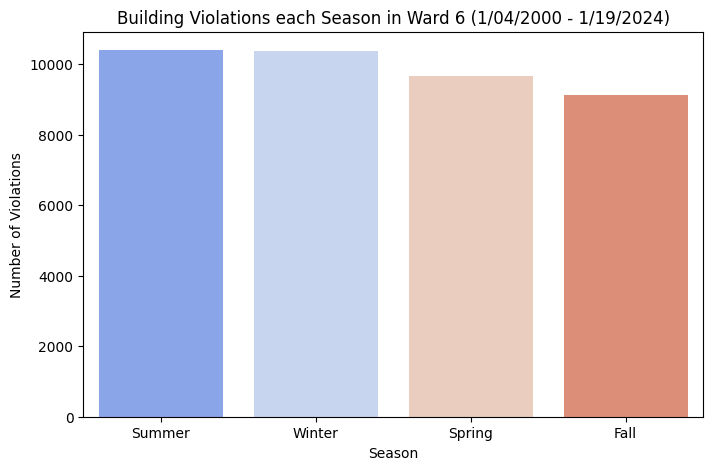

In [26]:
# Count of violations per season
season_counts = df_6['Season'].value_counts()

# Creating the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='coolwarm')
plt.xlabel('Season')
plt.ylabel('Number of Violations')
plt.title('Building Violations each Season in Ward 6 (1/04/2000 - 1/19/2024)')
plt.show()
# First Violation reported or took place in ward 6 on 01/04/2000.
# Most recent Violation reported or took place in ward 6 on 1/19/2024 as per the data provided.

**Analysis of the Bar Plot Trends**

*The high counts in summer and winter could be due to following factors:*

*Summer: More people might be outside, leading to more opportunities for violations to be noticed. Increased construction activity in warmer weather might also lead to more violations. Higher temperatures might also exacerbate existing problems,leading to more reports.*

*Winter: Harsh weather conditions could damage buildings,causing violations to emerge (e.g., water damage from frozen pipes).Snow and ice might also obscure hazards until warmer weather, Also, reduced visibility in winter months could contribute to accidents, potentially leading to related violations.*

*Differences from other seasons (spring/fall): These seasons might have fewer violations because of more moderate weather, less construction activity, and fewer people outdoors.*

**Filtering Dataset to Keep the Top 5 Most Common Case Disposition Types**

In [27]:
# Counting the occurrences of each case disposition
case_disposition_counts = df_6['CASE DISPOSITION'].value_counts()

# Five most common case dispositions
top_5_dispositions = case_disposition_counts.nlargest(5).index

# Filtering the DataFrame to include only the top 5 dispositions
df_filtered = df_6[df_6['CASE DISPOSITION'].isin(top_5_dispositions)]

**(a) Number of rows in dataframe**

In [28]:
df_filtered.shape[0]

38382

**Creating Histograms for CityDelay with Colored Bars**

In [29]:
print(df_filtered['Citydelay'].describe())

count    38369.000000
mean       249.742188
std        194.460935
min      -2317.000000
25%        131.000000
50%        203.000000
75%        321.000000
max       6253.000000
Name: Citydelay, dtype: float64


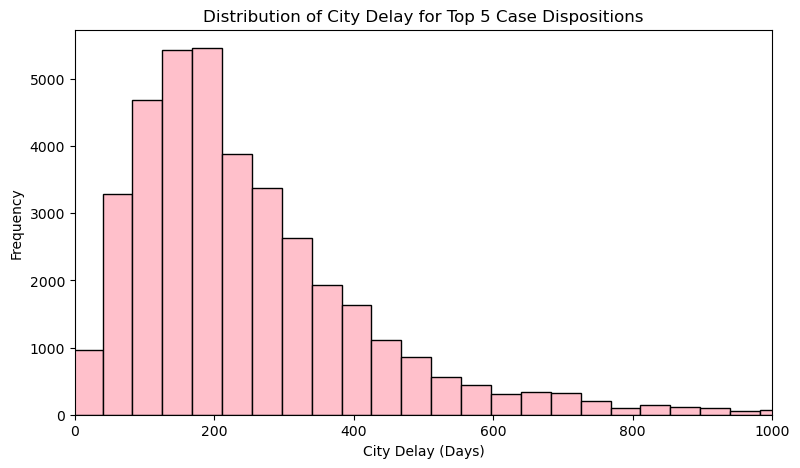

In [73]:
# Histogram for City Delay:
plt.figure(figsize=(9, 5))
plt.hist(df_filtered['Citydelay'], bins=200, color='pink', edgecolor='black')
plt.xlabel('City Delay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of City Delay for Top 5 Case Dispositions')
plt.xlim(0,1000)
plt.show()

*The histogram displays the distribution of city delay (in days) for the top 5 case dispositions. The distribution is right-skewed, with most cases experiencing delays between 0 to 300 days, peaking around 150-200 days before gradually declining.*

**Three key observations:**

*Peak Around 150-200 Days: The highest frequency suggests that most cases are processed within this range, possibly due to standard procedural timelines.*

*Long Tail Beyond 400 Days: Some cases experience extreme delays, which could be due to legal complexities, administrative backlog, or continuances.*

*Decreasing Frequency Over Time: As delays extend beyond 300-400 days, the frequency drops, possibly indicating that fewer cases require prolonged resolution, or that prolonged delays correlate with more complex legal or bureaucratic challenges.*

**Barplot of Average Imposed Fine by Case Disposition**

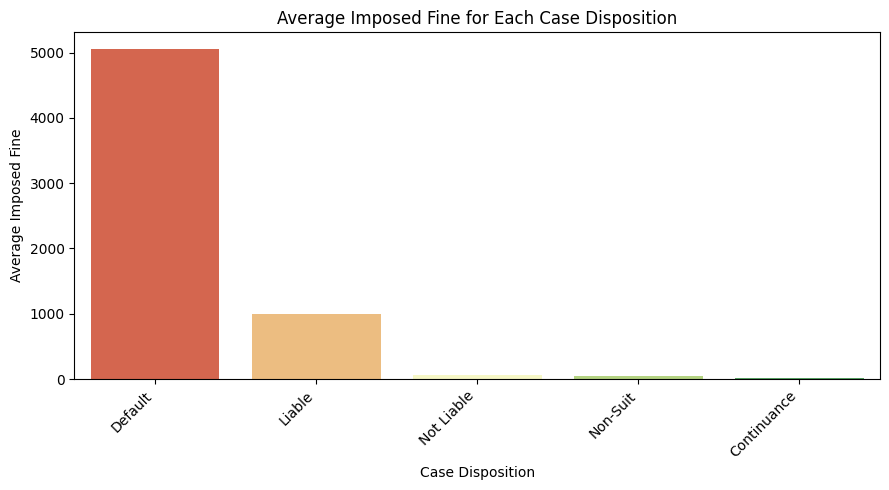

In [30]:
# Average imposed fine for each case disposition:
average_fine_by_disposition = df_filtered.groupby('CASE DISPOSITION')['IMPOSED FINE'].mean().sort_values(ascending = False)

# Creating the bar plot:
plt.figure(figsize=(9, 5))
sns.barplot(x=average_fine_by_disposition.index, y=average_fine_by_disposition.values, palette='RdYlGn')
plt.xlabel('Case Disposition')
plt.ylabel('Average Imposed Fine')
plt.title('Average Imposed Fine for Each Case Disposition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analysis of the Barplot: Explanation and Speculation**

*This bar chart displays the average imposed fine for different case dispositions. The most striking observation is that Default cases have the highest fines, exceeding $5000 on average. This suggests that when a defendant fails to appear or respond, courts impose severe penalties, possibly as a deterrent to non-compliance.*

*Liable cases show significantly lower average fines, around $1000, indicating that while penalties exist for those found responsible, they are not as extreme as Default cases. On the other hand, Not Liable, Non-Suit, and Continuance cases have much smaller or near-zero fines, which makes sense—if a case is dismissed or the defendant is not found responsible, they are not heavily penalized.*

*The stark difference in fines across these categories likely reflects the severity of legal consequences for non-compliance versus a fair trial outcome. Default judgments often carry automatic maximum penalties, while cases that go through litigation result in more moderate or no fines depending on the verdict. Courts may use high Default fines to enforce responsibility and discourage missing legal proceedings.*

**Speculation:**

*Default cases have the highest fines, likely due to automatic judgments imposed when defendants fail to appear or respond, serving as a strong deterrent.*

*Liable cases show significantly lower fines, suggesting that penalties vary based on legal arguments, defenses, or negotiated settlements.*

*Not Liable, Non-Suit, and Continuance cases have little to no fines, as these often involve dismissals, lack of evidence, or procedural delays rather than a guilty ruling.*

*These differences likely reflect the court’s emphasis on compliance and participation, where those who engage in the legal process receive more nuanced penalties, while non-compliance leads to harsher consequences.*

**Histogram of Admin Costs by Case Disposition**

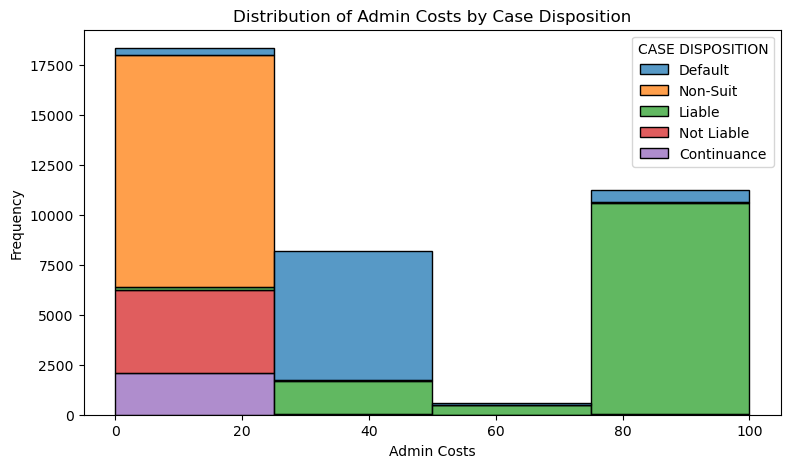

In [80]:
# Histogram for Admin Costs by Case Disposition:
plt.figure(figsize=(9, 5))
sns.histplot(data=df_filtered, x='ADMIN COSTS', hue='CASE DISPOSITION', multiple="stack", bins=4)
plt.xlabel('Admin Costs')
plt.ylabel('Frequency')
plt.title('Distribution of Admin Costs by Case Disposition')
plt.show()

**Analysis of the Histogram Plot**


*The largest concentration of cases appears at the lowest admin cost range (near 0), with Non-Suit cases dominating this range, followed by Not Liable and Continuance cases. This suggests that cases that are dismissed or ruled in favor of the defendant tend to incur lower administrative costs. In contrast, cases with higher admin costs (40 and 100) are largely associated with Default and Liable cases, indicating that cases with legal accountability or procedural penalties tend to have higher costs.*

*The cluster at 100 admin cost is particularly striking, mostly composed of Liable and Default cases, implying that certain cases incur a standard maximum administrative cost. This pattern might be due to fixed court fees for specific case outcomes or mandatory penalties associated with certain rulings.*

*Overall, the histogram suggests that administrative costs are strongly linked to case dispositions, with dismissed or non-liable cases being less costly, while cases where responsibility is assigned (Default or Liable) tend to have higher costs.*

**Filtering the Dataset for the Top 5 Violation Descriptions**

In [31]:
# Counting the occurrences of each violation code:
violation_code_counts = df_filtered['VIOLATION CODE'].value_counts()
print(violation_code_counts,"\n")

# Five most common violation codes:
top_5_violation_codes = violation_code_counts.nlargest(5).index
print(f"TOP 5 VIOLATION CODES:\n\n {top_5_violation_codes}", "\n")

# Filtering the DataFrame to include only the top 5 violation codes
top_5_violation_codes = df_filtered[df_filtered['VIOLATION CODE'].isin(top_5_violation_codes)]

# Display the unique violation descriptions for the filtered data
print(f"TOP 5 VIOLATION DESCRIPTION:\n\n{top_5_violation_codes['VIOLATION DESCRIPTION'].unique()}")

VIOLATION CODE
190019    2129
070024    1554
061014    1368
196029    1051
104015     959
          ... 
151127       1
220055       1
137046       1
231801       1
302081       1
Name: count, Length: 543, dtype: int64 

TOP 5 VIOLATION CODES:

 Index(['190019', '070024', '061014', '196029', '104015'], dtype='object', name='VIOLATION CODE') 

TOP 5 VIOLATION DESCRIPTION:

['Arrange for inspection of premises. (13-12-100)'
 'Repair exterior wall. (13-196-010, 13-196-530 B)'
 'Replace broken, missing or defective window panes. (13-196-550 A)'
 'Repair or replace defective or missing members of porch system. (13-196-570)'
 "Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030)"]


**Shortening Violation Descriptions for Visualization**

In [32]:
# Mapping Violation Descriptions:
description_mapping = {
    'Arrange for inspection of premises. (13-12-100)': 'Inspection',
    'Repair exterior wall. (13-196-010, 13-196-530 B)': 'Wall Repair',
    'Replace broken, missing or defective window panes. (13-196-550 A)': 'Window Repair',
    'Repair or replace defective or missing members of porch system. (13-196-570)': 'Porch Repair',
    "Post name, address, and telephone of owner, owner's agent for managing, controlling or collecting rents, and any other person managing or controlling building conspicuously where accessible or visible to public way. (13-12-030)": 'Post Owner Info'
}

top_5_violation_codes['VIOLATION DESCRIPTION'] = top_5_violation_codes['VIOLATION DESCRIPTION'].map(description_mapping)
print(top_5_violation_codes['VIOLATION DESCRIPTION'].unique())

['Inspection' 'Wall Repair' 'Window Repair' 'Porch Repair'
 'Post Owner Info']


**Barplot of Mean Imposed Fine for Top Five Violation Descriptions**

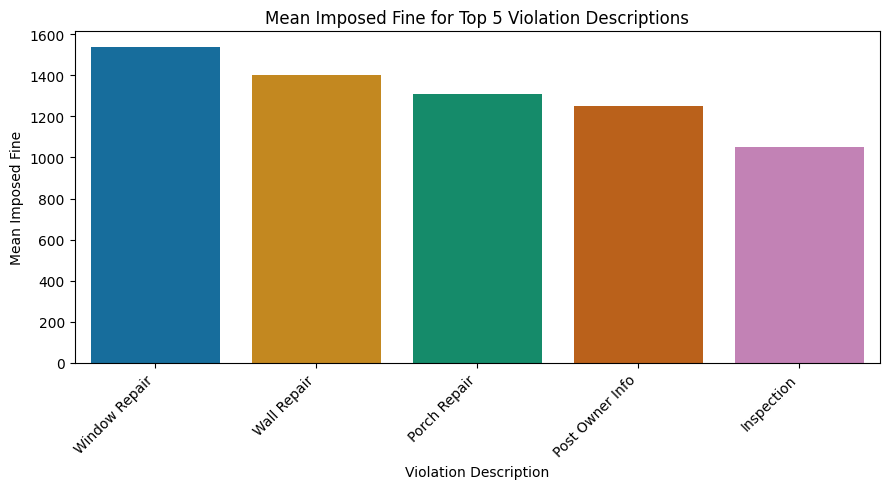

In [33]:
# Barplot
plt.figure(figsize=(9,5))
sns.barplot(x='VIOLATION DESCRIPTION', y='IMPOSED FINE', data=top_5_violation_codes, ci=None, palette='colorblind', order=top_5_violation_codes.groupby('VIOLATION DESCRIPTION')['IMPOSED FINE'].mean().sort_values(ascending=False).index)
plt.xlabel('Violation Description')
plt.ylabel('Mean Imposed Fine')
plt.title('Mean Imposed Fine for Top 5 Violation Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*This bar chart displays the mean imposed fines for the top five violation descriptions. Window Repair violations have the highest average fine, followed closely by Wall Repair, Porch Repair, Post Owner Info, and Inspection violations. The fines for these violations range between 1000 usd and 1600 usd, indicating that property-related issues incur significant penalties.*

**Speculation on Fine Differences:**

*Higher fines for structural violations (Window, Wall, and Porch Repairs) are due to their direct impact on safety and property integrity. Damaged windows, walls, and porches pose serious risks to residents and the public, justifying stricter penalties.*

*Post Owner Info violations also receive a high fine, likely because failing to provide ownership details can hinder communication in emergencies or legal matters, leading to regulatory enforcement.*

*Inspection-related fines are slightly lower but still substantial, suggesting that failure to arrange proper inspections is considered an administrative lapse rather than an immediate safety hazard.*

*Overall, violations tied to public safety, building integrity, and regulatory compliance tend to receive larger fines. The severity of these fines likely reflects the potential risks posed by neglecting these issues and the city's efforts to enforce timely repairs and accountability.*